In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import visualkeras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/train_set_label.csv")

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,17.0,136.0,196.0,23.871923,90.499390,5.882156,103.054809,apple
1,49.0,69.0,82.0,18.315615,15.361435,7.263119,81.787105,chickpea
2,74.0,49.0,38.0,23.314104,71.450905,7.488014,164.497037,jute
3,104.0,35.0,28.0,27.510061,50.666872,6.983732,143.995555,coffee
4,23.0,72.0,84.0,19.020613,17.131591,6.920251,79.926981,chickpea


In [6]:
len(df)

1650

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1650 non-null   float64
 1   P            1650 non-null   float64
 2   K            1650 non-null   float64
 3   temperature  1650 non-null   float64
 4   humidity     1650 non-null   float64
 5   ph           1650 non-null   float64
 6   rainfall     1650 non-null   float64
 7   crop         1650 non-null   object 
dtypes: float64(7), object(1)
memory usage: 103.2+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,1650.0,50.370308,36.743966,0.000000,21.000000,37.000000,84.738202,136.000000
P,1650.0,53.419241,33.320501,5.000000,27.000000,52.000000,68.000000,145.000000
K,1650.0,48.111081,50.537044,5.000000,20.552276,31.575398,49.000000,205.000000
temperature,1650.0,25.647214,5.005005,9.467960,22.807269,25.656980,28.529953,42.936054
humidity,1650.0,71.563115,22.198130,14.273280,60.120113,80.547206,90.003702,99.981876
ph,1650.0,6.485583,0.765865,3.525366,5.986160,6.426118,6.924943,9.935091
rainfall,1650.0,103.965778,55.510324,20.360011,65.025621,95.246217,127.887636,298.560117


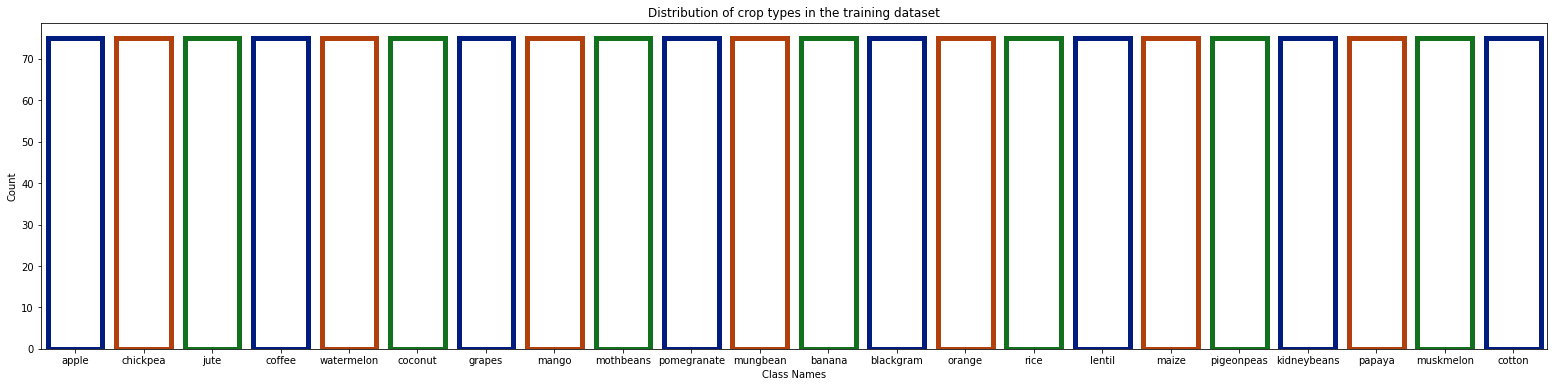

In [9]:
plt.figure(figsize=(27,6))
sns.countplot(x = 'crop', data = df, facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Class Names')
plt.ylabel('Count')
plt.title('Distribution of crop types in the training dataset')
plt.show()

In [10]:
#perfectly balanced, as all things should be

In [11]:
#correlation b/w features

In [12]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.232892,-0.143022,0.014088,0.185919,0.080087,0.049705
P,-0.232892,1.000000,0.735456,-0.133283,-0.119861,-0.145958,-0.064344
K,-0.143022,0.735456,1.000000,-0.162041,0.188512,-0.193294,-0.054222
temperature,0.014088,-0.133283,-0.162041,1.000000,0.201797,-0.018037,0.000306
humidity,0.185919,-0.119861,0.188512,0.201797,1.000000,-0.011764,0.105829
ph,0.080087,-0.145958,-0.193294,-0.018037,-0.011764,1.000000,-0.138397
rainfall,0.049705,-0.064344,-0.054222,0.000306,0.105829,-0.138397,1.000000


In [13]:
df.crop.nunique()

22

In [14]:
#label encoding
le = LabelEncoder()
df.crop = le.fit_transform(df.crop)

In [15]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,17.0,136.0,196.0,23.871923,90.499390,5.882156,103.054809,0
1,49.0,69.0,82.0,18.315615,15.361435,7.263119,81.787105,3
2,74.0,49.0,38.0,23.314104,71.450905,7.488014,164.497037,8
3,104.0,35.0,28.0,27.510061,50.666872,6.983732,143.995555,5
4,23.0,72.0,84.0,19.020613,17.131591,6.920251,79.926981,3


In [16]:
df.corr()['crop']

N             -0.032348
P             -0.487802
K             -0.346647
temperature    0.115894
humidity       0.196417
ph             0.004351
rainfall       0.051488
crop           1.000000
Name: crop, dtype: float64

In [17]:
le_crop = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for crop:") 
print(le_crop)
#print(sex[:10])

Sklearn label encoder results for crop:
{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


<AxesSubplot:>

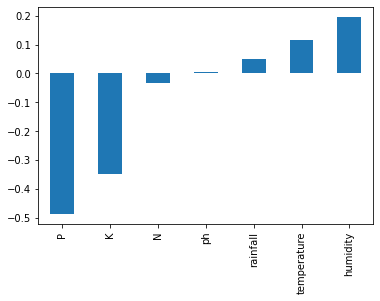

In [18]:
df.corr()['crop'].iloc[:-1].sort_values().plot(kind = 'bar')

In [19]:
#We see here that out of all our features, ph, rainfall, tenperature and humidity has positive correlation with the crop.

<AxesSubplot:>

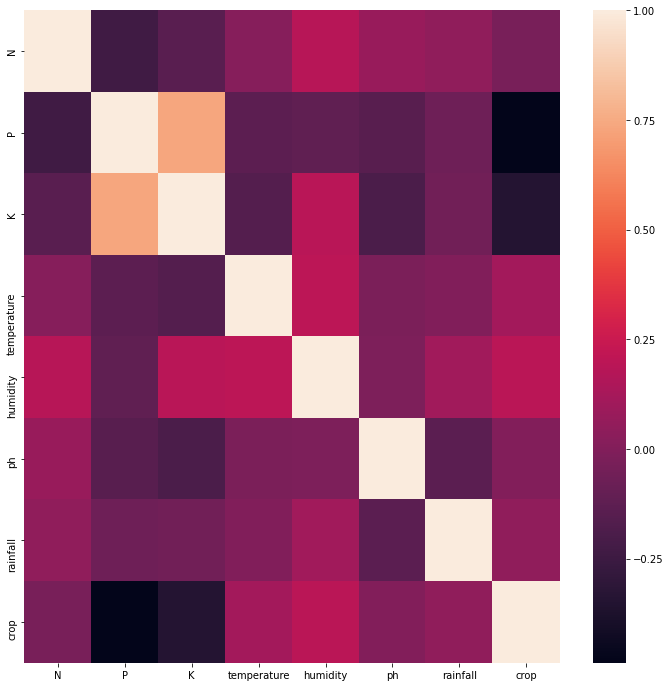

In [20]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr())

In [21]:
#dividing the features and labels
X = df.drop('crop', axis = 1).values
y = df['crop'].values

In [22]:
#train test split

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
#feature scaling
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_val = scaler.transform(X_val)

In [27]:
X_train.shape

(1155, 7)

In [28]:
X_val.shape

(495, 7)

In [29]:
X_train

array([[0.29411765, 0.07857143, 0.15      , ..., 0.46538769, 0.22300076,
        0.28010053],
       [0.24264706, 0.3       , 0.06      , ..., 0.39666654, 0.79506504,
        0.15626705],
       [0.19585479, 0.21774901, 0.07302987, ..., 0.40422196, 0.68853658,
        0.16507034],
       ...,
       [0.23642599, 0.23571429, 0.073881  , ..., 0.55651739, 0.83497213,
        0.04607642],
       [0.07352941, 0.52142857, 0.065     , ..., 0.56505407, 0.43240716,
        0.08487537],
       [0.72794118, 0.37142857, 0.15      , ..., 0.78058091, 0.37989213,
        0.90607822]])

In [207]:
from sklearn.metrics import accuracy_score

In [208]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [209]:
pred = model.predict(X_val)

In [210]:
print('Accuracy Score is: ', accuracy_score(y_val, pred))

Accuracy Score is:  0.9939393939393939


In [260]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/test_set_label.csv')

In [261]:
test_data.head()

,N,P,K,temperature,humidity,ph,rainfall
0,22.00000,51.00000,16.000000,27.965837,61.349001,8.639586,70.104721
1,130.20691,59.20691,18.586179,25.123987,82.356124,6.707583,91.431992
2,28.00000,27.00000,34.000000,32.454653,50.696938,6.526654,95.048716
3,40.00000,61.00000,22.000000,20.949818,65.810876,7.002216,44.239130
4,28.00000,46.00000,16.000000,29.008124,84.960894,6.664188,45.910114


In [262]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            550 non-null    float64
 1   P            550 non-null    float64
 2   K            550 non-null    float64
 3   temperature  550 non-null    float64
 4   humidity     550 non-null    float64
 5   ph           550 non-null    float64
 6   rainfall     550 non-null    float64
dtypes: float64(7)
memory usage: 30.2 KB


In [263]:
test_data = scaler.transform(test_data)

In [264]:
test_data.shape

(550, 7)

In [265]:
target = model.predict(test_data)

In [266]:
target

array([13,  6, 12, 10, 14,  5, 10,  6, 10, 10,  8, 13, 16,  1,  4, 15,  7,
        5, 21, 14,  4, 20, 13, 11,  0, 16, 20, 21, 19, 13,  9, 14,  1, 17,
        2,  3,  9,  4, 10, 17,  7,  7, 20,  3,  7, 18, 21, 18, 21, 12, 11,
       12,  7, 18, 20,  9,  0,  4, 21,  0, 14,  5, 21, 14,  0,  9, 16,  7,
       21,  4, 11, 19,  6,  0, 11,  8, 13,  6,  6, 18, 18, 13,  1,  0,  9,
        6,  1,  3,  0, 11,  7, 16, 19,  2, 21, 13,  7,  0,  3, 16, 16, 15,
        4,  8, 16,  6, 18,  6,  6, 12, 19,  3, 11, 13,  5,  9,  1,  4, 10,
        8,  2,  5,  9, 14,  6, 17, 21,  4, 17,  2, 20, 13, 15, 13,  8, 14,
       19, 18,  5,  5, 12,  8,  8,  6,  3,  3, 17, 13, 16,  0,  5, 14, 11,
        3,  2, 10, 16,  9, 19, 17,  2, 12, 19,  8, 18, 13,  3, 15,  3, 10,
       12,  4,  1,  5, 20, 12, 21, 21,  8,  4, 18, 17, 20, 16,  6,  2, 18,
       12, 12,  2,  8, 16, 17, 11, 11,  6, 17, 15,  0,  5,  4, 21, 15, 15,
        4,  3, 11, 14,  6, 15, 13, 20, 10, 20,  9,  7, 18, 10,  8,  7, 11,
       11, 15, 12, 14,  1

In [267]:
target = pd.DataFrame(target)

In [268]:
target.rename(columns = {0: 'Pred'}, inplace=True)

In [269]:
my_dict = {y:x for x,y in le_crop.items()}

In [270]:
my_dict

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

In [271]:
target['prediction'] = target['Pred'].map(my_dict)

In [272]:
target.drop('Pred', axis = 1, inplace = True)

In [273]:
target

,prediction
0,mothbeans
1,cotton
2,mango
3,lentil
4,mungbean
...,...
545,chickpea
546,coconut
547,coconut
548,apple


In [275]:
target.to_csv("submission.csv", index = False)